In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle('./cleanedDublin.pkl')
df.head()

,hashedid,hashedathleteid,startdatelocal,totaldistance,city_name,country_code,distance_100,time_100,elevation_100,cadence_100,heartrate_100,pace_diff_100,pace_cumul_100,gap_100
0,9a344e1b10a653c2cee3d40cabd615d46d2604198b15bb...,197b3e2a67167805191c315e64640e5b3aa0dae4a7cba3...,2017-10-29 09:10:29,42311.3,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 38.98845, 75.44795, 112.36312, 143.05545...","[18.3, 17.900051, 17.956602, 17.997967, 17.303...",[],"[124.0, 138.00153, 158.49796, 172.15256, 183.9...","[1e-05, 6.682236, 6.02834, 5.416158, 4.943549,...","[25.0, 6.498075, 6.287327, 6.242397, 5.960643,...","[0.0, 6.828764, 6.009906, 5.404039, 5.133536, ..."
1,9eab2135ab8c8182d2e6eb36c87606efa3418d31a7b152...,85ab08865f60f548c2a362aeadf7d2fac801b0b75d0c21...,2017-10-29 09:10:39,42461.3,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 38.141705, 75.420105, 112.58787, 140.797...","[18.0, 18.1182, 18.568665, 18.237965, 17.30003...","[1e-05, 60.776775, 78.99788, 78.99595, 79.3095...","[69.0, 118.00433, 115.79638, 117.72328, 118.03...","[1e-05, 6.744568, 5.696991, 4.160349, 4.65892,...","[25.0, 6.357691, 6.28458, 6.255208, 5.866589, ...","[0.0, 6.701542, 5.559884, 4.235624, 4.902388, ..."
2,9ec542cb1a44509fd87521c5743d400987df1433b48544...,ef33b1f6295728ab85be787754de13ef0f22d85546dc95...,2017-10-29 09:02:03,42396.6,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 34.051785, 63.714027, 99.33842, 126.0090...","[17.8, 17.979973, 18.573772, 18.525688, 18.340...","[84.0, 86.831635, 87.57081, 85.98568, 88.64971...",[],"[1e-05, 5.229298, 5.400293, 5.635104, 4.725854...","[25.0, 5.686955, 5.31107, 5.518765, 5.250323, ...","[0.0, 5.178599, 5.229725, 5.649802, 4.773427, ..."
3,9ec8e3139fcd0b60af668440d0560c30d4eec6faf9ede5...,ffa2c7a60a904ff047b58e43bb4a1c17e55fbbcf173127...,2017-10-29 08:55:33,42621.4,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 363.61026, 395.8846, 423.8148, 459.01483...","[17.1, 18.10048, 18.188477, 18.501003, 18.2008...",[],[],"[1e-05, 4.854006, 5.094511, 4.652123, 4.432908...","[25.0, 25.0, 25.0, 23.5453, 19.125616, 16.3804...","[0.0, 4.598914, 5.070293, 4.574117, 4.505633, ..."
4,9f0e9a093a823fcf03a22948c4e417c4de0a4bf126b865...,3168b39d03feaa62356a49abbadf57ccec493d7a25de23...,2017-10-29 09:00:25,42489.4,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 33.269478, 64.696045, 98.46664, 124.9062...","[-132.2, -131.97264, -131.61813, -131.48433, -...","[60.0, 92.47492, 94.040146, 94.219345, 96.0676...","[108.0, 129.89734, 134.17978, 135.58492, 141.1...","[1e-05, 5.756402, 4.844161, 4.206395, 4.504928...","[25.0, 5.546336, 5.391422, 5.470671, 5.204367,...","[0.0, 5.685999, 4.752145, 4.17603, 4.401713, 4..."


In [3]:
# df['total_marathon_ran'] = df['distance_100'].apply(lambda x: x[-1])
df = df[(df['totaldistance'] > 1000) & (df['totaldistance'] < 43000)]

In [4]:
mean_pace = []
finish_time = []
expected_finish = []
time_diff=[]
status=[]

for idx, row in df.iterrows():
    pace = np.array(row['pace_diff_100'])
    mean_pace.append(pace.mean())
    
    expected_finish.append((pace.mean()*60)*42.2)
    
    time = np.array(row["time_100"])
    finish_time.append(time[-1])
    
    diff = finish_time[-1] - expected_finish[-1] 
    time_diff.append(diff)
    
    if row['totaldistance'] > 42200:
        status.append(1) #finish
    else:
        status.append(0) #dnf
    
df["mean_pace"] = mean_pace
df["finish_time"] = finish_time
df["expected_finish"] = expected_finish
df["time_diff"] = time_diff
df["status"] = status


,hashedid,hashedathleteid,startdatelocal,totaldistance,city_name,country_code,distance_100,time_100,elevation_100,cadence_100,heartrate_100,pace_diff_100,pace_cumul_100,gap_100,mean_pace,finish_time,expected_finish,time_diff,status
0,9a344e1b10a653c2cee3d40cabd615d46d2604198b15bb...,197b3e2a67167805191c315e64640e5b3aa0dae4a7cba3...,2017-10-29 09:10:29,42311.3,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 38.98845, 75.44795, 112.36312, 143.05545...","[18.3, 17.900051, 17.956602, 17.997967, 17.303...",[],"[124.0, 138.00153, 158.49796, 172.15256, 183.9...","[1e-05, 6.682236, 6.02834, 5.416158, 4.943549,...","[25.0, 6.498075, 6.287327, 6.242397, 5.960643,...","[0.0, 6.828764, 6.009906, 5.404039, 5.133536, ...",5.119294,13093.263,12962.051396,131.211604,1
1,9eab2135ab8c8182d2e6eb36c87606efa3418d31a7b152...,85ab08865f60f548c2a362aeadf7d2fac801b0b75d0c21...,2017-10-29 09:10:39,42461.3,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 38.141705, 75.420105, 112.58787, 140.797...","[18.0, 18.1182, 18.568665, 18.237965, 17.30003...","[1e-05, 60.776775, 78.99788, 78.99595, 79.3095...","[69.0, 118.00433, 115.79638, 117.72328, 118.03...","[1e-05, 6.744568, 5.696991, 4.160349, 4.65892,...","[25.0, 6.357691, 6.28458, 6.255208, 5.866589, ...","[0.0, 6.701542, 5.559884, 4.235624, 4.902388, ...",5.869760,14995.840,14862.231323,133.608677,1
2,9ec542cb1a44509fd87521c5743d400987df1433b48544...,ef33b1f6295728ab85be787754de13ef0f22d85546dc95...,2017-10-29 09:02:03,42396.6,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 34.051785, 63.714027, 99.33842, 126.0090...","[17.8, 17.979973, 18.573772, 18.525688, 18.340...","[84.0, 86.831635, 87.57081, 85.98568, 88.64971...",[],"[1e-05, 5.229298, 5.400293, 5.635104, 4.725854...","[25.0, 5.686955, 5.31107, 5.518765, 5.250323, ...","[0.0, 5.178599, 5.229725, 5.649802, 4.773427, ...",5.164121,13152.599,13075.554420,77.044580,1
3,9ec8e3139fcd0b60af668440d0560c30d4eec6faf9ede5...,ffa2c7a60a904ff047b58e43bb4a1c17e55fbbcf173127...,2017-10-29 08:55:33,42621.4,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 363.61026, 395.8846, 423.8148, 459.01483...","[17.1, 18.10048, 18.188477, 18.501003, 18.2008...",[],[],"[1e-05, 4.854006, 5.094511, 4.652123, 4.432908...","[25.0, 25.0, 25.0, 23.5453, 19.125616, 16.3804...","[0.0, 4.598914, 5.070293, 4.574117, 4.505633, ...",4.946503,12864.319,12524.546725,339.772275,1
4,9f0e9a093a823fcf03a22948c4e417c4de0a4bf126b865...,3168b39d03feaa62356a49abbadf57ccec493d7a25de23...,2017-10-29 09:00:25,42489.4,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 33.269478, 64.696045, 98.46664, 124.9062...","[-132.2, -131.97264, -131.61813, -131.48433, -...","[60.0, 92.47492, 94.040146, 94.219345, 96.0676...","[108.0, 129.89734, 134.17978, 135.58492, 141.1...","[1e-05, 5.756402, 4.844161, 4.206395, 4.504928...","[25.0, 5.546336, 5.391422, 5.470671, 5.204367,...","[0.0, 5.685999, 4.752145, 4.17603, 4.401713, 4...",4.403699,11219.243,11150.165802,69.077198,1


In [6]:
df.describe()

,totaldistance,mean_pace,finish_time,expected_finish,time_diff,status
count,3046.00000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000
mean,41888.39107,5.654888,14261.055450,14318.177372,-57.121921,0.918582
std,3085.62113,0.997349,2703.943976,2525.287603,1269.599219,0.273521
min,17036.10000,3.275906,4879.385700,8294.593323,-19003.370778,0.000000
25%,42375.65000,4.945709,12520.855750,12522.536447,10.041505,1.000000
50%,42450.05000,5.550654,14077.820500,14054.255353,70.485557,1.000000
75%,42525.67500,6.216338,15773.637750,15739.767122,158.664181,1.000000
max,42997.80000,13.661325,44614.555000,34590.475278,24055.267030,1.000000


In [7]:
df['status'].value_counts()

1    2798
0     248
Name: status, dtype: int64

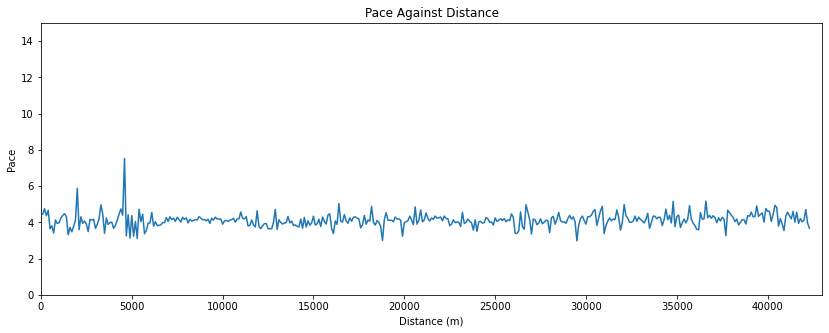

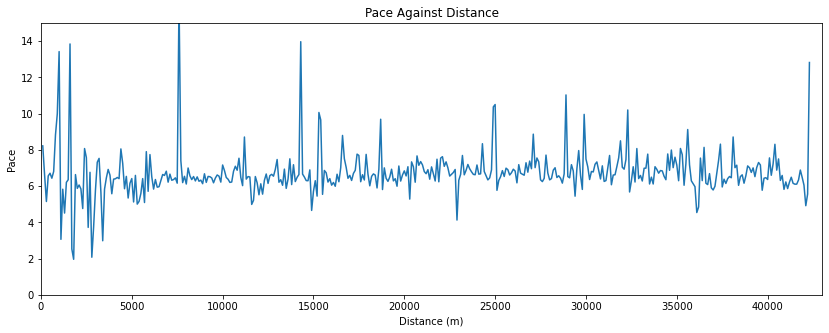

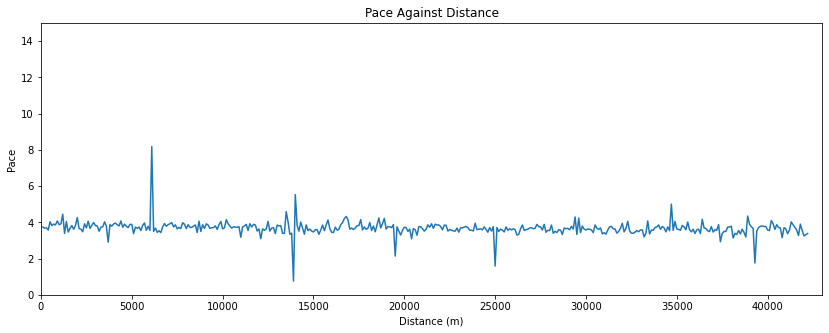

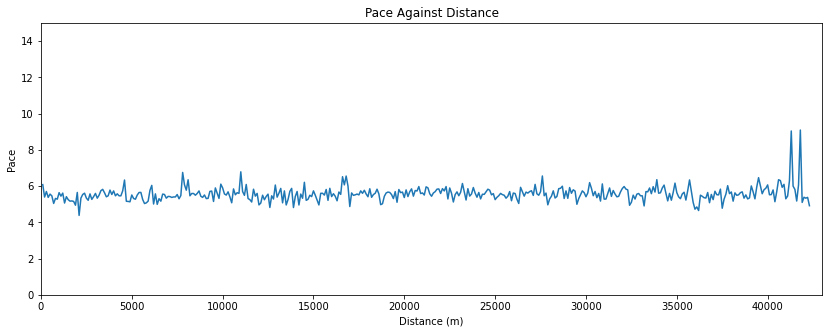

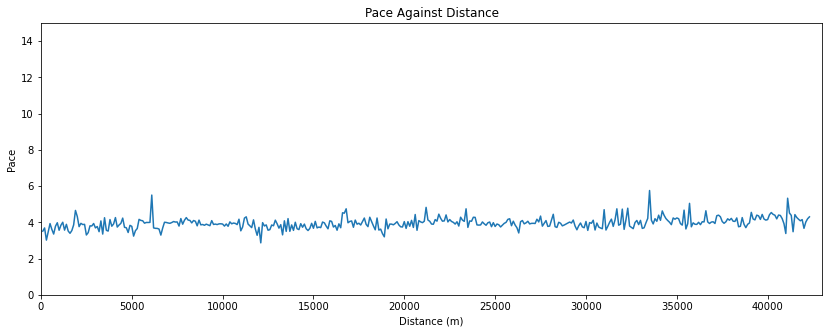

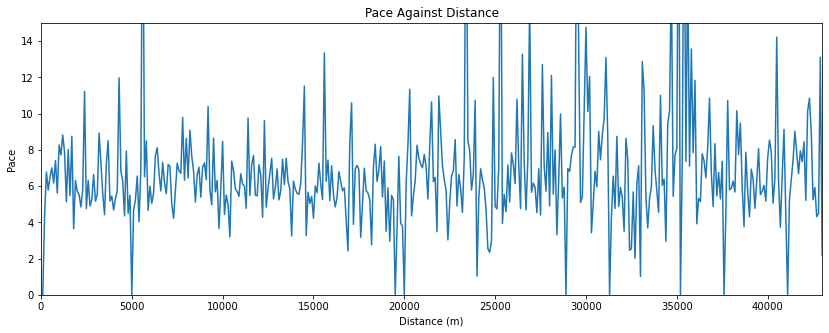

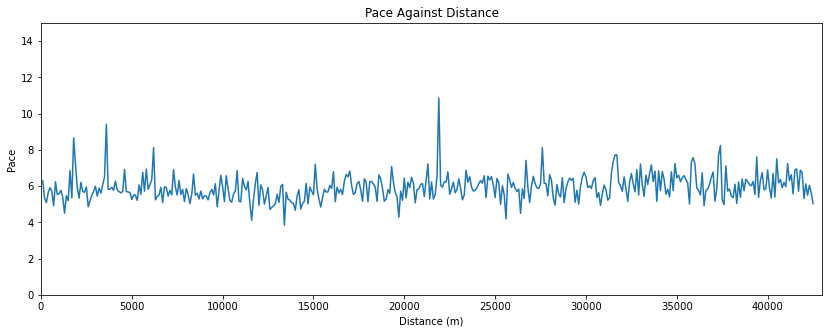

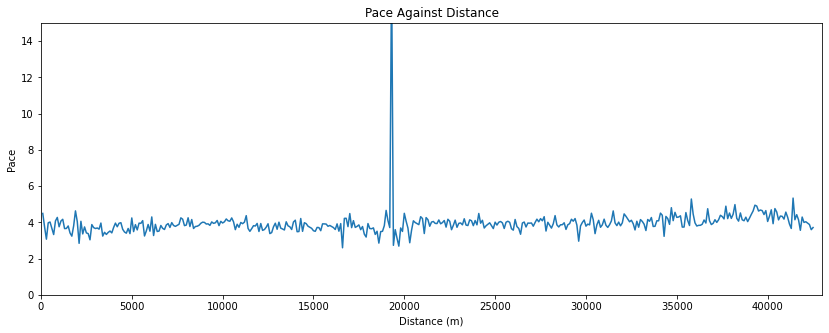

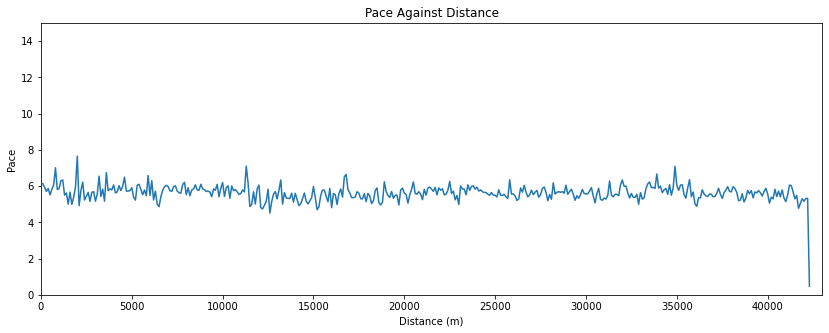

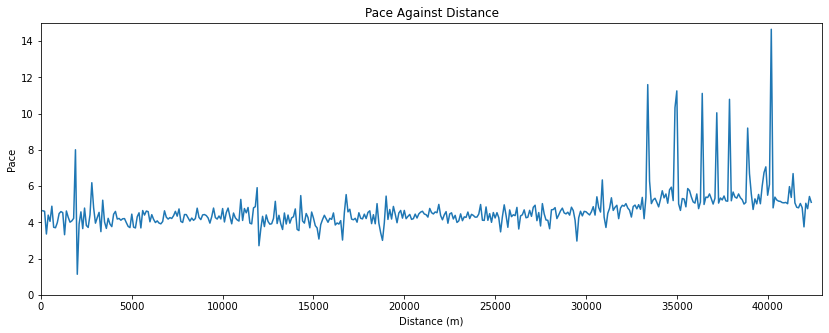

In [9]:
for x in range(10, 20):
    row = df.iloc[x]
    dist = row['distance_100'][1:]
    
    if (row['pace_diff_100'][2] < 25.0):
        pace = row['pace_diff_100'][1:]
    else:
        continue;

    plt.figure(figsize=(14,5))
    plt.plot(dist, pace)
    plt.title('Pace Against Distance')
    plt.xlim(0, 43000)
    plt.ylim(0, 15)
    plt.xlabel('Distance (m)')
    plt.ylabel('Pace')
    plt.show()

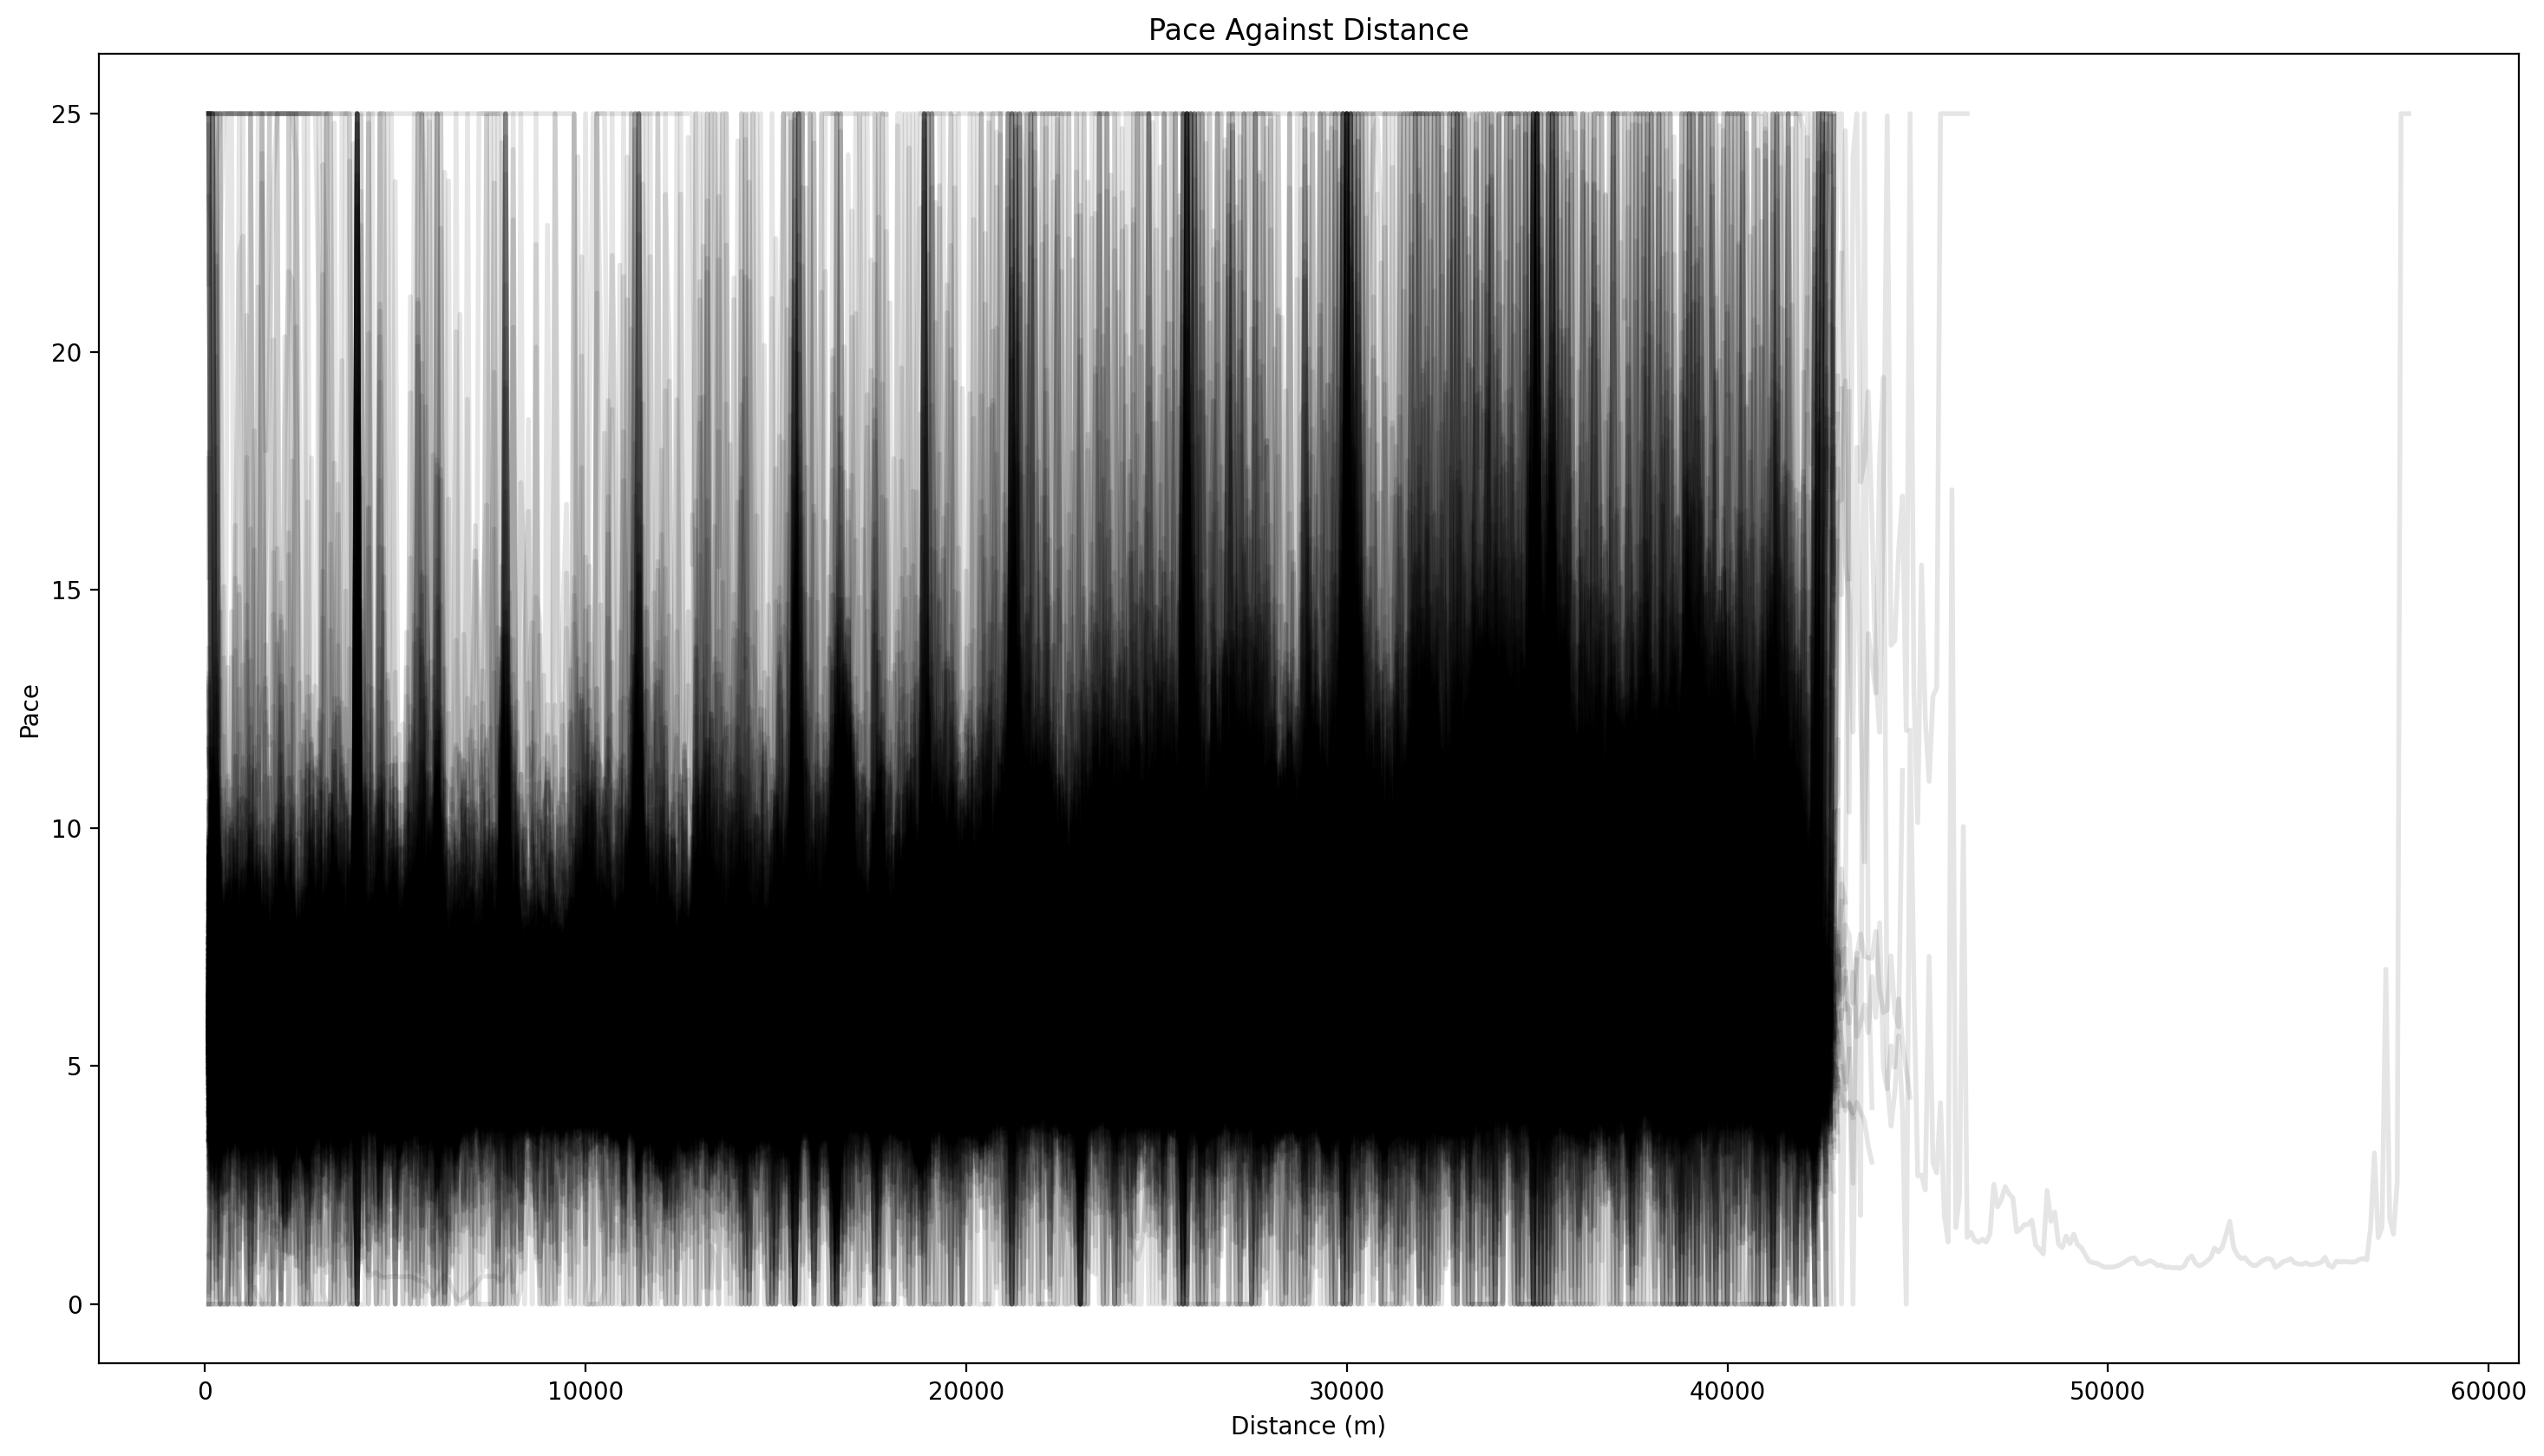

In [10]:
fig = plt.figure(figsize=(18,10), dpi=200)
ax = plt.gca()

for idx, row in df.sample(n=2500, random_state=10).iterrows():
    dist = row['distance_100']
    pace = row['pace_diff_100']
    
    ax.plot(dist[1:], pace[1:], color='black', lw=2, alpha=0.1) #1: = one onwards, lw = line width, alpha = opacity
    
plt.title('Pace Against Distance')
plt.xlabel('Distance (m)')
plt.ylabel('Pace')
plt.show()

In [11]:
len(df)

3046

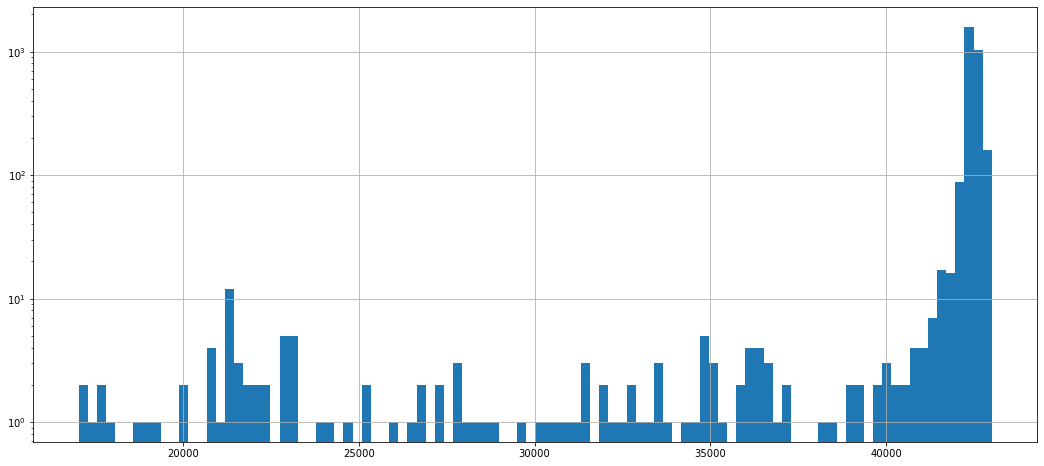

In [12]:
fig = plt.figure(figsize=(18,8))
df['totaldistance'].hist(bins=100)
plt.yscale('log')

In [13]:
from collections import Counter

def count_water_stations(row=None, counter_dist_waterstop=None):
    dist = np.array(row['distance_100'])
    pace = np.array(row['pace_diff_100'])
    ave_pace = pace.mean()
    mask = pace >= 1.1 * ave_pace #slowing down by 10% of avg pace
    
    #display(mask)
    #display(dist[mask], pace[mask])
    #ax.plot(dist[1:], pace[1:], color='black', lw=2, alpha=0.9)

    counter_dist_waterstop.update(dist[mask])
#     for d in dist[mask]:
#         display(d)
#         counter_dist_waterstop.update(d)
        
    return

counter_dist_waterstop = Counter()

for idx, row in df.iterrows():
    count_water_stations(row=row, counter_dist_waterstop=counter_dist_waterstop)

display(counter_dist_waterstop)

Counter({100.0: 1497,
         200.0: 930,
         700.0: 385,
         800.0: 613,
         2000.0: 756,
         2700.0: 232,
         3500.0: 191,
         4000.0: 784,
         7500.0: 84,
         11800.0: 191,
         14100.0: 236,
         16600.0: 546,
         16700.0: 1202,
         19600.0: 237,
         19800.0: 142,
         23900.0: 473,
         26500.0: 515,
         27400.0: 580,
         35000.0: 1355,
         35600.0: 1776,
         35700.0: 1806,
         37300.0: 968,
         39400.0: 1158,
         39900.0: 1186,
         40500.0: 1137,
         3200.0: 424,
         4600.0: 630,
         6100.0: 1012,
         14000.0: 422,
         18000.0: 190,
         27200.0: 598,
         29400.0: 375,
         30100.0: 889,
         30500.0: 309,
         31200.0: 293,
         31400.0: 531,
         31500.0: 363,
         31900.0: 935,
         32000.0: 1420,
         32300.0: 734,
         32400.0: 446,
         32800.0: 477,
         33200.0: 497,
         33300.0: 

In [14]:
df_counter = pd.DataFrame.from_dict(counter_dist_waterstop.items())
df_counter.columns = ['dist', 'count']
df_counter

,dist,count
0,100.0,1497
1,200.0,930
2,700.0,385
3,800.0,613
4,2000.0,756
...,...,...
462,14700.0,68
463,57300.0,1
464,57700.0,1
465,57800.0,1


In [15]:
# print(df_counter['dist'])
print(df_counter.nunique())

dist     467
count    333
dtype: int64


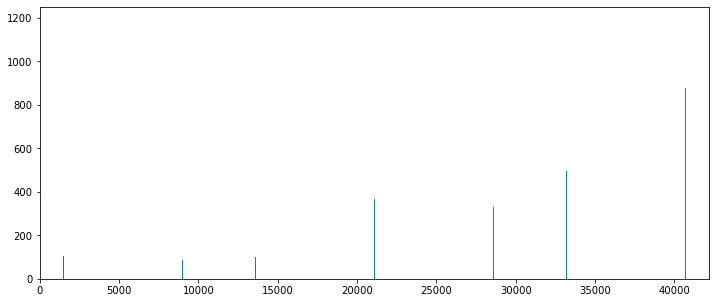

In [16]:
x = df_counter["dist"]
y = df_counter["count"]

plt.figure(figsize=(12,5))
plt.xlim(0, 42200)
plt.ylim(0,1250)
plt.bar(x, y)
plt.show()

# plt.xlabel("Courses offered")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")

# ax.set_xticklabels([10000, 20000, 30000, 40000, 50000])

# this is where people are slowing down [potential water stations]
# 10 water station every 2.5 miles (4km)... 4000m

In [17]:
#how much do they slow down by before water stations
ws_slow = []
ws_increase = []

for idx, row in df.sample(n=2500, random_state=10).iterrows():
    pace = np.array(row['pace_diff_100'])

    for i in range(40,420,40):
        #pace at water stations
        try:
            water_station_pace = pace[i]
        except IndexError:
            continue;
            
        #pace 100m before water stations
        try:
            before_station_pace = pace[i-1] 
        except IndexError:
            continue;

        #pace 100m after water stations
        try:
            after_station_pace = pace[i+1] 
        except IndexError:
            continue;

#         print(pace[i]) 
#         print(pace[i-1])
#         print(pace[i+1])

        ws_slow.append(abs(water_station_pace - before_station_pace))
        ws_increase.append(abs(after_station_pace - water_station_pace))

ws_slow = np.array(ws_slow)
ws_increase = np.array(ws_increase)

print("mean slow was {:.4f}".format(ws_slow.mean()))
print("mean increase was {:.4f}".format(ws_increase.mean()))

print("\n")

print("variance slow was {:.4f}".format(ws_slow.var()))
print("variance increase was {:.4f}".format(ws_increase.var()))

mean slow was 0.7551
mean increase was 0.7395


variance slow was 2.1347
variance increase was 1.9903


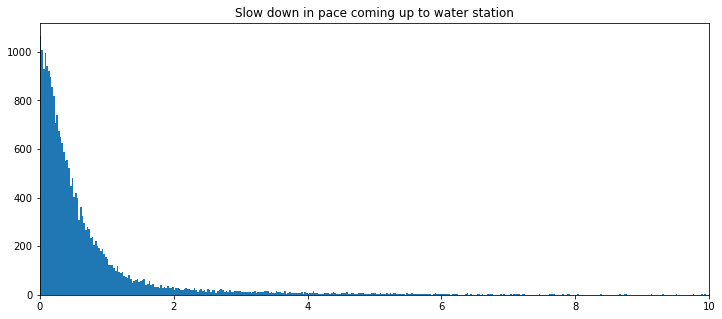

In [18]:
plt.figure(figsize=(12,5))
plt.hist(ws_slow, bins=1000)
plt.title("Slow down in pace coming up to water station")
plt.xlim(0, 10)
plt.show()

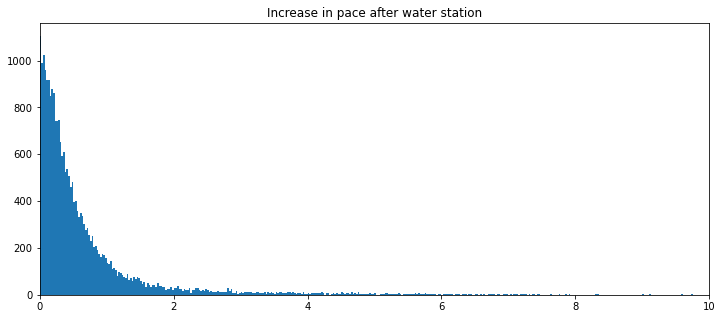

In [19]:
plt.figure(figsize=(12,5))
plt.hist(ws_increase, bins=1000)
plt.title("Increase in pace after water station")
plt.xlim(0, 10)
plt.show()

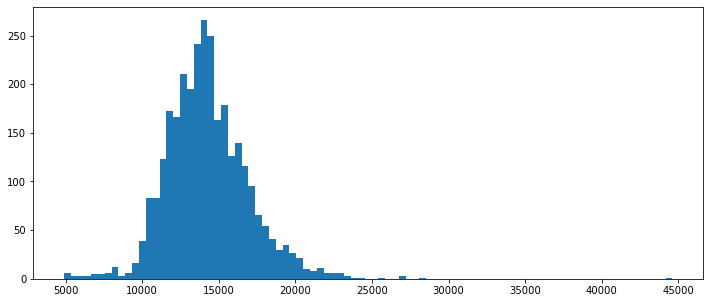

In [20]:
x = df["finish_time"]

plt.figure(figsize=(12,5))
plt.hist(x, bins="auto")
plt.show()

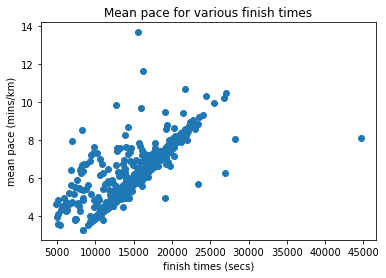

In [21]:
x = df["finish_time"]
y = df["mean_pace"]

plt.scatter(x, y)
plt.title("Mean pace for various finish times")
plt.ylabel("mean pace (mins/km)")
plt.xlabel("finish times (secs)")
plt.show()

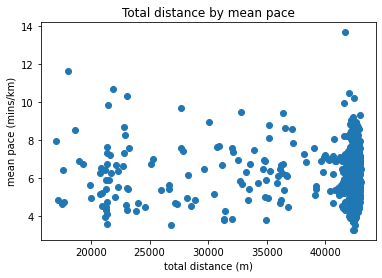

In [22]:
x = df["totaldistance"]
y = df["mean_pace"]

plt.scatter(x, y)
plt.title("Total distance by mean pace")
plt.ylabel("mean pace (mins/km)")
plt.xlabel("total distance (m)")
plt.show()
#20k that is half marathon, people stopping

In [23]:
from sklearn.cluster import KMeans
X = np.array(df["mean_pace"])
X = X.reshape(-1,1)

kmeans=KMeans(n_clusters=3, random_state=1)
kmeans.fit_predict(X)
print(kmeans.labels_)

[1 0 1 ... 1 0 1]


In [80]:
df["labels"] = kmeans.labels_
# df.head()

count_arr = np.bincount(kmeans.labels_)

fast= count_arr[2]
medium= count_arr[0]
slow= count_arr[1]

print(fast)
print(medium)
print(slow)

#len(df)
#len(kmeans.labels_)

503
1432
1111


In [25]:
df.head()

,hashedid,hashedathleteid,startdatelocal,totaldistance,city_name,country_code,distance_100,time_100,elevation_100,cadence_100,heartrate_100,pace_diff_100,pace_cumul_100,gap_100,mean_pace,finish_time,expected_finish,time_diff,status,labels
0,9a344e1b10a653c2cee3d40cabd615d46d2604198b15bb...,197b3e2a67167805191c315e64640e5b3aa0dae4a7cba3...,2017-10-29 09:10:29,42311.3,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 38.98845, 75.44795, 112.36312, 143.05545...","[18.3, 17.900051, 17.956602, 17.997967, 17.303...",[],"[124.0, 138.00153, 158.49796, 172.15256, 183.9...","[1e-05, 6.682236, 6.02834, 5.416158, 4.943549,...","[25.0, 6.498075, 6.287327, 6.242397, 5.960643,...","[0.0, 6.828764, 6.009906, 5.404039, 5.133536, ...",5.119294,13093.263,12962.051396,131.211604,1,1
1,9eab2135ab8c8182d2e6eb36c87606efa3418d31a7b152...,85ab08865f60f548c2a362aeadf7d2fac801b0b75d0c21...,2017-10-29 09:10:39,42461.3,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 38.141705, 75.420105, 112.58787, 140.797...","[18.0, 18.1182, 18.568665, 18.237965, 17.30003...","[1e-05, 60.776775, 78.99788, 78.99595, 79.3095...","[69.0, 118.00433, 115.79638, 117.72328, 118.03...","[1e-05, 6.744568, 5.696991, 4.160349, 4.65892,...","[25.0, 6.357691, 6.28458, 6.255208, 5.866589, ...","[0.0, 6.701542, 5.559884, 4.235624, 4.902388, ...",5.869760,14995.840,14862.231323,133.608677,1,0
2,9ec542cb1a44509fd87521c5743d400987df1433b48544...,ef33b1f6295728ab85be787754de13ef0f22d85546dc95...,2017-10-29 09:02:03,42396.6,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 34.051785, 63.714027, 99.33842, 126.0090...","[17.8, 17.979973, 18.573772, 18.525688, 18.340...","[84.0, 86.831635, 87.57081, 85.98568, 88.64971...",[],"[1e-05, 5.229298, 5.400293, 5.635104, 4.725854...","[25.0, 5.686955, 5.31107, 5.518765, 5.250323, ...","[0.0, 5.178599, 5.229725, 5.649802, 4.773427, ...",5.164121,13152.599,13075.554420,77.044580,1,1
3,9ec8e3139fcd0b60af668440d0560c30d4eec6faf9ede5...,ffa2c7a60a904ff047b58e43bb4a1c17e55fbbcf173127...,2017-10-29 08:55:33,42621.4,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 363.61026, 395.8846, 423.8148, 459.01483...","[17.1, 18.10048, 18.188477, 18.501003, 18.2008...",[],[],"[1e-05, 4.854006, 5.094511, 4.652123, 4.432908...","[25.0, 25.0, 25.0, 23.5453, 19.125616, 16.3804...","[0.0, 4.598914, 5.070293, 4.574117, 4.505633, ...",4.946503,12864.319,12524.546725,339.772275,1,1
4,9f0e9a093a823fcf03a22948c4e417c4de0a4bf126b865...,3168b39d03feaa62356a49abbadf57ccec493d7a25de23...,2017-10-29 09:00:25,42489.4,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 33.269478, 64.696045, 98.46664, 124.9062...","[-132.2, -131.97264, -131.61813, -131.48433, -...","[60.0, 92.47492, 94.040146, 94.219345, 96.0676...","[108.0, 129.89734, 134.17978, 135.58492, 141.1...","[1e-05, 5.756402, 4.844161, 4.206395, 4.504928...","[25.0, 5.546336, 5.391422, 5.470671, 5.204367,...","[0.0, 5.685999, 4.752145, 4.17603, 4.401713, 4...",4.403699,11219.243,11150.165802,69.077198,1,1


In [26]:
 df["status"].value_counts()

1    2798
0     248
Name: status, dtype: int64

In [27]:
df["labels"].value_counts()

0    1432
1    1111
2     503
Name: labels, dtype: int64

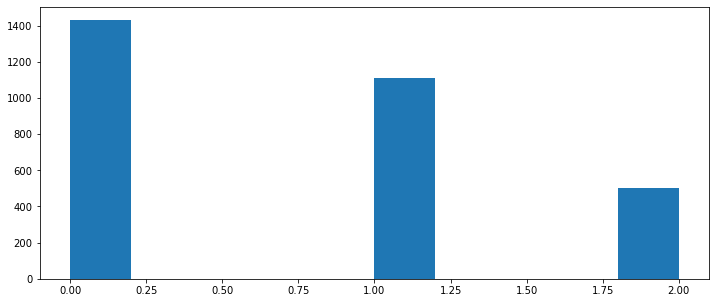

In [28]:
x = df["labels"]

plt.figure(figsize=(12,5))
plt.hist(x)
plt.show()

In [29]:
# print(X.shape)

In [30]:
centroids = kmeans.cluster_centers_
centroids

array([[5.81519443],
       [4.70996803],
       [7.29438967]])

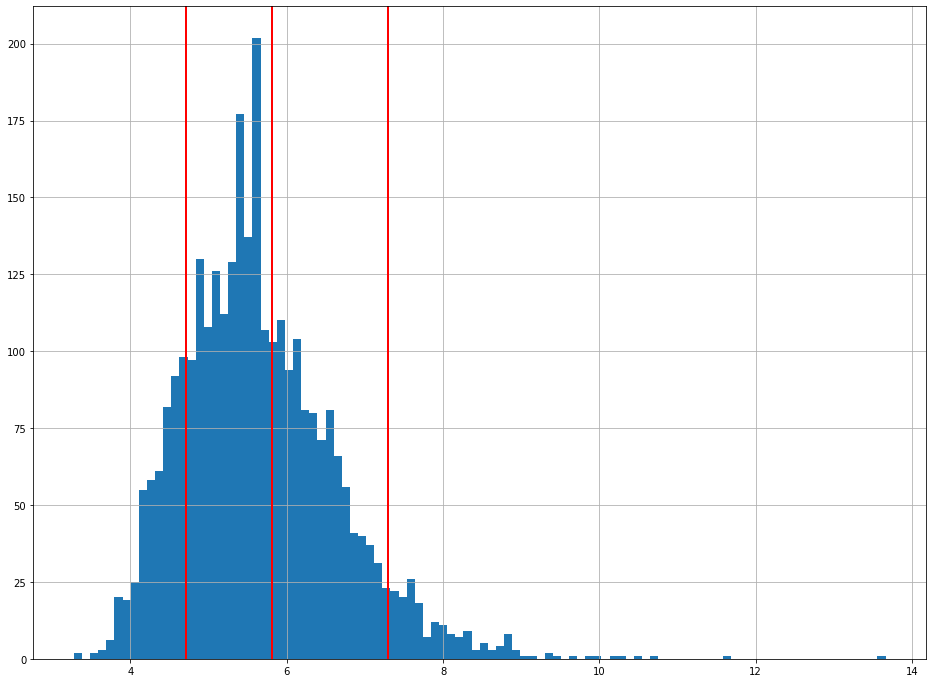

In [31]:
df.mean_pace.hist(bins=100, figsize=(16,12))
plt.axvline(x=centroids[0],lw=2,c='red')
plt.axvline(x=centroids[1],lw=2,c='red')
plt.axvline(x=centroids[2],lw=2,c='red')

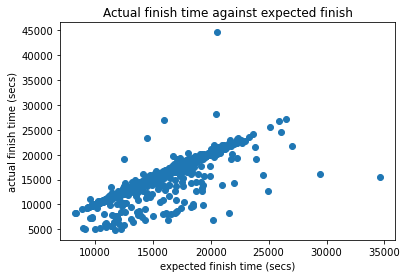

In [32]:
x = df["expected_finish"]
y = df["finish_time"]

plt.title("Actual finish time against expected finish")
plt.ylabel("actual finish time (secs)")
plt.xlabel("expected finish time (secs)")
plt.scatter(x, y)
plt.show()

In [33]:
plotThis = df.groupby('labels', as_index=False)['mean_pace'].mean()

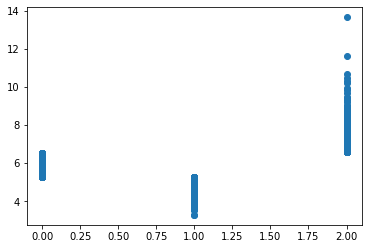

In [34]:
x = df["labels"]
y = df["mean_pace"]

plt.scatter(x, y)
plt.show()

<AxesSubplot:ylabel='Frequency'>

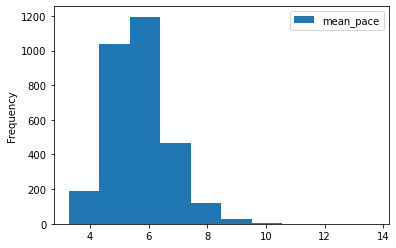

In [35]:
df.plot( x='labels', y='mean_pace', kind='hist')

In [36]:
len(mean_pace)

3046

In [129]:
# df.loc[df['labels'] == 2] # getting row indexes where 0,1,2 are labels

#6,2,7
# m,s,f

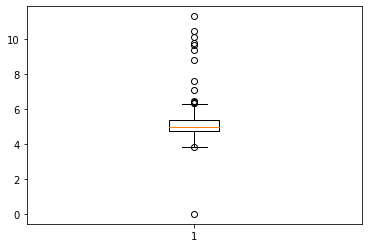

In [142]:
dist=df["distance_100"]
pace=df["pace_diff_100"]

pace_0_=pace.iloc[2]
pace_0=pd.DataFrame(pace_0_,columns=['Pace_0'])
#print(pace_0_)

#boxplot of paces of one runner
import matplotlib.pyplot as plt
box=plt.boxplot(pace_0)

In [143]:
# finding the 1st quartile
q1 = np.quantile(pace_0_, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(pace_0_, 0.75)
med = np.median(pace_0_)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

In [144]:
#finding indexes for outliers 
outliers=[]
for i in range(len(pace_0_)):
    if pace_0_[i]>upper_bound:
        outliers.append(i)
print(outliers)

[40, 61, 190, 275, 299, 338, 339, 341, 349, 356, 377, 378, 389]


In [145]:
#finding distances of those indexes
dist_0=np.array(dist.iloc[0])
dist_stop=dist_0[np.array(outliers).astype(int)]
print(dist_stop)

[ 4000.  6100. 19000. 27500. 29900. 33800. 33900. 34100. 34900. 35600.
 37700. 37800. 38900.]


In [146]:
x = np.diff(dist_stop)
print(x)

[ 2100. 12900.  8500.  2400.  3900.   100.   200.   800.   700.  2100.
   100.  1100.]


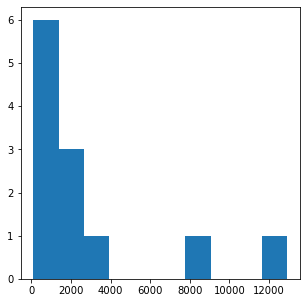

In [147]:
plt.figure(figsize=(5,5))
plt.hist(x, bins=10)
plt.show()

In [41]:
df.head()

,hashedid,hashedathleteid,startdatelocal,totaldistance,city_name,country_code,distance_100,time_100,elevation_100,cadence_100,heartrate_100,pace_diff_100,pace_cumul_100,gap_100,mean_pace,finish_time,expected_finish,time_diff,status,labels
0,9a344e1b10a653c2cee3d40cabd615d46d2604198b15bb...,197b3e2a67167805191c315e64640e5b3aa0dae4a7cba3...,2017-10-29 09:10:29,42311.3,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 38.98845, 75.44795, 112.36312, 143.05545...","[18.3, 17.900051, 17.956602, 17.997967, 17.303...",[],"[124.0, 138.00153, 158.49796, 172.15256, 183.9...","[1e-05, 6.682236, 6.02834, 5.416158, 4.943549,...","[25.0, 6.498075, 6.287327, 6.242397, 5.960643,...","[0.0, 6.828764, 6.009906, 5.404039, 5.133536, ...",5.119294,13093.263,12962.051396,131.211604,1,1
1,9eab2135ab8c8182d2e6eb36c87606efa3418d31a7b152...,85ab08865f60f548c2a362aeadf7d2fac801b0b75d0c21...,2017-10-29 09:10:39,42461.3,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 38.141705, 75.420105, 112.58787, 140.797...","[18.0, 18.1182, 18.568665, 18.237965, 17.30003...","[1e-05, 60.776775, 78.99788, 78.99595, 79.3095...","[69.0, 118.00433, 115.79638, 117.72328, 118.03...","[1e-05, 6.744568, 5.696991, 4.160349, 4.65892,...","[25.0, 6.357691, 6.28458, 6.255208, 5.866589, ...","[0.0, 6.701542, 5.559884, 4.235624, 4.902388, ...",5.869760,14995.840,14862.231323,133.608677,1,0
2,9ec542cb1a44509fd87521c5743d400987df1433b48544...,ef33b1f6295728ab85be787754de13ef0f22d85546dc95...,2017-10-29 09:02:03,42396.6,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 34.051785, 63.714027, 99.33842, 126.0090...","[17.8, 17.979973, 18.573772, 18.525688, 18.340...","[84.0, 86.831635, 87.57081, 85.98568, 88.64971...",[],"[1e-05, 5.229298, 5.400293, 5.635104, 4.725854...","[25.0, 5.686955, 5.31107, 5.518765, 5.250323, ...","[0.0, 5.178599, 5.229725, 5.649802, 4.773427, ...",5.164121,13152.599,13075.554420,77.044580,1,1
3,9ec8e3139fcd0b60af668440d0560c30d4eec6faf9ede5...,ffa2c7a60a904ff047b58e43bb4a1c17e55fbbcf173127...,2017-10-29 08:55:33,42621.4,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 363.61026, 395.8846, 423.8148, 459.01483...","[17.1, 18.10048, 18.188477, 18.501003, 18.2008...",[],[],"[1e-05, 4.854006, 5.094511, 4.652123, 4.432908...","[25.0, 25.0, 25.0, 23.5453, 19.125616, 16.3804...","[0.0, 4.598914, 5.070293, 4.574117, 4.505633, ...",4.946503,12864.319,12524.546725,339.772275,1,1
4,9f0e9a093a823fcf03a22948c4e417c4de0a4bf126b865...,3168b39d03feaa62356a49abbadf57ccec493d7a25de23...,2017-10-29 09:00:25,42489.4,dublin,ie,"[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...","[0.0, 33.269478, 64.696045, 98.46664, 124.9062...","[-132.2, -131.97264, -131.61813, -131.48433, -...","[60.0, 92.47492, 94.040146, 94.219345, 96.0676...","[108.0, 129.89734, 134.17978, 135.58492, 141.1...","[1e-05, 5.756402, 4.844161, 4.206395, 4.504928...","[25.0, 5.546336, 5.391422, 5.470671, 5.204367,...","[0.0, 5.685999, 4.752145, 4.17603, 4.401713, 4...",4.403699,11219.243,11150.165802,69.077198,1,1


In [42]:
for col in df.columns:
    print(col)

hashedid
hashedathleteid
startdatelocal
totaldistance
city_name
country_code
distance_100
time_100
elevation_100
cadence_100
heartrate_100
pace_diff_100
pace_cumul_100
gap_100
mean_pace
finish_time
expected_finish
time_diff
status
labels


In [43]:
new_df = df[["gap_100", "status"]]
new_df.head()

,gap_100,status
0,"[0.0, 6.828764, 6.009906, 5.404039, 5.133536, ...",1
1,"[0.0, 6.701542, 5.559884, 4.235624, 4.902388, ...",1
2,"[0.0, 5.178599, 5.229725, 5.649802, 4.773427, ...",1
3,"[0.0, 4.598914, 5.070293, 4.574117, 4.505633, ...",1
4,"[0.0, 5.685999, 4.752145, 4.17603, 4.401713, 4...",1


In [44]:
# for idx, row in new_df.iterrows():
# #     time = row['time_100']
# #     elev = row['elevation_100']
#     gap = row['gap_100']
    
# #     if not (len(time) == len(elev) and len(time) == len(gap)):
# #         print("Row ", idx, " Not equal")
# #     print(len(time), ", ", len(elev), ", ", len(gap))

# #     time = time[:190]
# #     elev = elev[:190]
#     gap = gap[:190]
    
# #     new_df.at[idx, 'time_100'] = time
# #     new_df.at[idx, 'elevation_100'] = elev
#     new_df.at[idx, 'gap_100'] = gap
# # print(len(new_df.at[0, 'gap_100']))

In [45]:
new_df.head()

,gap_100,status
0,"[0.0, 6.828764, 6.009906, 5.404039, 5.133536, ...",1
1,"[0.0, 6.701542, 5.559884, 4.235624, 4.902388, ...",1
2,"[0.0, 5.178599, 5.229725, 5.649802, 4.773427, ...",1
3,"[0.0, 4.598914, 5.070293, 4.574117, 4.505633, ...",1
4,"[0.0, 5.685999, 4.752145, 4.17603, 4.401713, 4...",1


In [46]:
mean_gap = []
gap_var = []
gap_std = []

for idx, row in new_df.iterrows():
    gap = np.array(row['gap_100'])
    gap = gap[:190]
    new_df.at[idx, 'gap_100'] = gap
    
    mean_gap.append(gap.mean())
    gap_var.append(gap.var())
    gap_std.append(gap.std())
    
new_df["mean_gap"] = mean_gap
new_df["gap_var"] = gap_var
new_df["gap_std"] = gap_std

new_df.head()

<ipython-input-46-902be153262d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["mean_gap"] = mean_gap
<ipython-input-46-902be153262d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["gap_var"] = gap_var
<ipython-input-46-902be153262d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,gap_100,status,mean_gap,gap_var,gap_std
0,"[0.0, 6.828764, 6.009906, 5.404039, 5.133536, ...",1,5.049998,0.647825,0.804876
1,"[0.0, 6.701542, 5.559884, 4.235624, 4.902388, ...",1,5.417926,0.775419,0.880579
2,"[0.0, 5.178599, 5.229725, 5.649802, 4.773427, ...",1,4.942014,0.680133,0.824702
3,"[0.0, 4.598914, 5.070293, 4.574117, 4.505633, ...",1,4.943101,1.247975,1.117128
4,"[0.0, 5.685999, 4.752145, 4.17603, 4.401713, 4...",1,4.233829,0.324304,0.569477


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [169]:
X = new_df[["mean_gap","gap_var","gap_std"]]
y = new_df["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.1, max_depth=6, random_state=1).fit(X_train, y_train)
# gbc.score(X_test, y_test)

In [171]:
# setattr (gbc, 'scale_pos_weight', 4) # assuming 80:20 ratio

In [172]:
y_predicted = gbc.predict(X_test)
print(y_predicted.sum())

868


In [173]:
len(y_predicted)

914

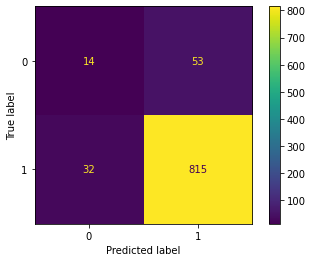

In [174]:
plot_confusion_matrix(gbc, X_test, y_test)

In [175]:
# accuracy = accuracy_score(y_test, y_predicted)
# precision = precision_score(y_test, y_predicted, pos_label=1)
# recall = recall_score(y_test, y_predicted, pos_label=1)

sens = classification_report(y_test, y_predicted)
# spec = 

print(sens)
# print(f"Accuracy: {accuracy:.3f}")
# print(f"Precision score: {precision:.3f}")
# print(f"Recall score: {recall:.3f}")

              precision    recall  f1-score   support

           0       0.30      0.21      0.25        67
           1       0.94      0.96      0.95       847

    accuracy                           0.91       914
   macro avg       0.62      0.59      0.60       914
weighted avg       0.89      0.91      0.90       914



In [176]:
# 'kernel' parameter Specifies the kernel type to be used in the algorithm
from sklearn.svm import SVC

svc = SVC(kernel='rbf', class_weight='balanced')
svc.fit(X_train, y_train)

SVC(class_weight='balanced')

In [177]:
y_predicted = svc.predict(X_test)

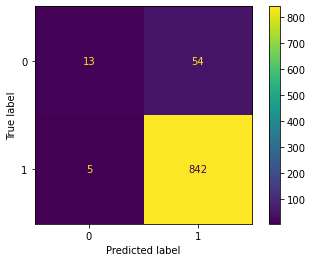

In [178]:
plot_confusion_matrix(svc, X_test, y_test)

In [179]:
# accuracy = accuracy_score(y_test, y_predicted)
# precision = precision_score(y_test, y_predicted, pos_label=1)
# recall = recall_score(y_test, y_predicted, pos_label=1)

# print(f"Accuracy: {accuracy:.3f}")
# print(f"Precision score: {precision:.3f}")
# print(f"Recall score: {recall:.3f}")

sens = classification_report(y_test, y_predicted)
print(sens)

              precision    recall  f1-score   support

           0       0.72      0.19      0.31        67
           1       0.94      0.99      0.97       847

    accuracy                           0.94       914
   macro avg       0.83      0.59      0.64       914
weighted avg       0.92      0.94      0.92       914

